# <span style="color:#d63031">EDA for cardiovascular disease dataset</span>

***

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite3 import connect
import sqlite3 as sql


In [5]:
database="cardio.db"
connection=sql.connect(database)
query='''SELECT * FROM cardio_train'''
df=pd.read_sql_query(query,connection)

#  <span style="color:#00b894">Data Exploration:</span>

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=70000, step=1)

In [9]:
df.shape

(70000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
'''In the description of the data, it was not clear which number represented a female and 
which number a male, so I calculated the average height.'''

df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

***

# <span style="color:#192a56">Data Cleaning:</span>

### <span style="color:#40739e">-unnecessary column</span>

In [15]:
df.drop('id',axis=1, inplace=True)

### <span style="color:#40739e">-Missing values</span>

In [16]:
df.isnull().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### <span style="color:#40739e">-Duplicate Rows</span>

In [17]:
df.duplicated().sum()

24

In [18]:
df.drop_duplicates(keep='last',inplace=True)

### <span style="color:#40739e">-Aggregation</span>

In [19]:
df['age'] = round(df['age'] / 365)

### <span style="color:#40739e">-Outliers</span>

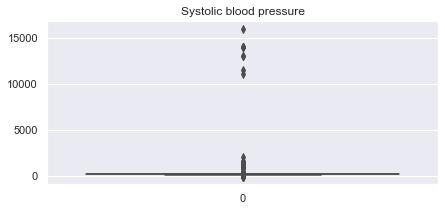

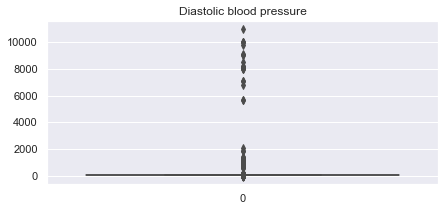

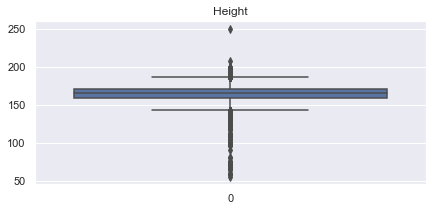

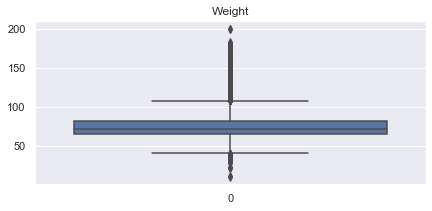

In [20]:
columns={'ap_hi':'Systolic blood pressure','ap_lo':'Diastolic blood pressure','height':'Height','weight':'Weight'}
sns.set(rc={'figure.figsize':(7,3)})
for key, value in columns.items():
    sns.boxplot(data=df[key])
    plt.title(value)
    plt.show()


In [21]:
Q1a=df.age.quantile(0.25)
Q3a=df.age.quantile(0.75)
IQRa=Q3a-Q1a
lower_limita=Q1a-1.5*IQRa
upper_limita=Q3a+1.5*IQRa

Q1h=df.height.quantile(0.25)
Q3h=df.height.quantile(0.75)
IQRh=Q3h-Q1h
lower_limith=Q1h-1.5*IQRh
upper_limith=Q3h+1.5*IQRh

Q1w=df.weight.quantile(0.25)
Q3w=df.weight.quantile(0.75)
IQRw=Q3w-Q1w
lower_limitw=Q1w-1.5*IQRw
upper_limitw=Q3w+1.5*IQRw

Q1hi=df.ap_hi.quantile(0.25)
Q3hi=df.ap_hi.quantile(0.75)
IQRhi=Q3hi-Q1hi
lower_limithi=Q1hi-1.5*IQRhi
upper_limithi=Q3hi+1.5*IQRhi

Q1lo=df.ap_lo.quantile(0.25)
Q3lo=df.ap_lo.quantile(0.75)
IQRlo=Q3lo-Q1lo
lower_limitlo=Q1lo-1.5*IQRlo
upper_limitlo=Q3lo+1.5*IQRlo

DF=df[(df.age>lower_limita)&(df.age<upper_limita)&
      (df.height>lower_limith)&(df.height<upper_limith)&(df.weight>lower_limitw)&(df.weight<upper_limitw)
      &(df.ap_hi>lower_limithi)&(df.ap_hi<upper_limithi)&(df.ap_lo>lower_limitlo)&(df.ap_lo<upper_limitlo)]
DF.shape


(61747, 12)

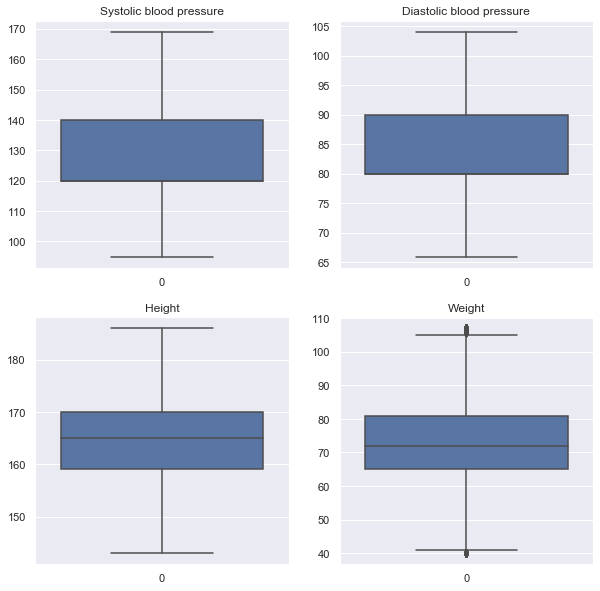

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
plt.subplot(2,2,1)
sns.boxplot(data=DF["ap_hi"])
plt.title('Systolic blood pressure')
plt.subplot(2,2,2)
sns.boxplot(data=DF["ap_lo"])
plt.title('Diastolic blood pressure')
plt.subplot(2,2,3)
sns.boxplot(data=DF["height"])
plt.title('Height')
plt.subplot(2,2,4)
sns.boxplot(data=DF["weight"])
plt.title('Weight');


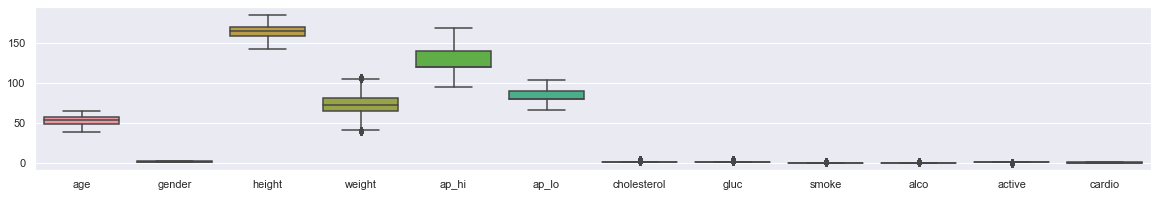

In [23]:
sns.set(rc={'figure.figsize':(20,3)})
sns.boxplot(data=DF);

###  <span style="color:#40739e">-Combinations</span>


In [24]:
DF["bmi"] = DF.weight / (DF.height / 100) ** 2

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
DF.shape

(61747, 13)

***

## <span style="color:#f0932b">Data Visualization:</span>

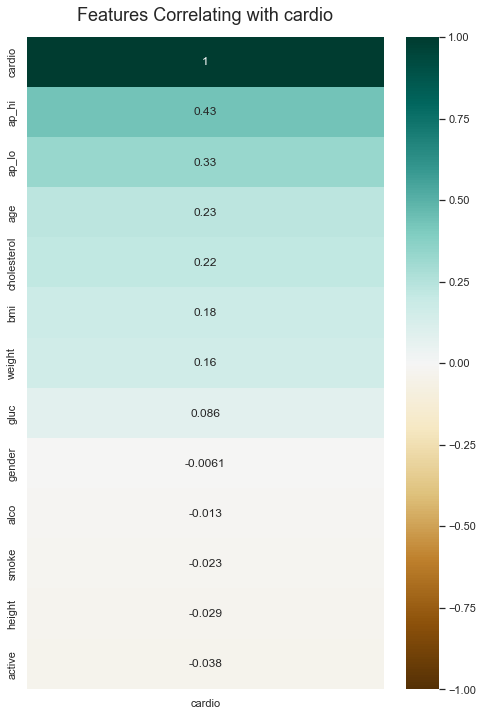

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(DF.corr()[['cardio']].sort_values(by='cardio', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with cardio', fontdict={'fontsize':18}, pad=16);

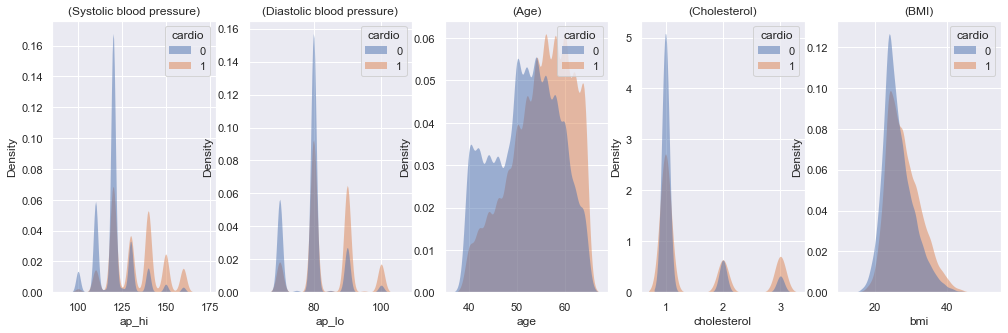

In [26]:
sns.set(rc={'figure.figsize':(17,5)})
plt.subplot(1,5,1)
sns.kdeplot(
   data=DF, x="ap_hi", hue="cardio",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.title('(Systolic blood pressure)')
plt.subplot(1,5,2)
sns.kdeplot(
   data=DF, x="ap_lo", hue="cardio",
   fill=True,
   alpha=.5, linewidth=0,
)
plt.title('(Diastolic blood pressure)')
plt.subplot(1,5,3)
sns.kdeplot(
   data=DF, x="age", hue="cardio",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.title('(Age)')
plt.subplot(1,5,4)
sns.kdeplot(
   data=DF, x="cholesterol", hue="cardio",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.title('(Cholesterol)')
plt.subplot(1,5,5)
sns.kdeplot(
   data=DF, x="bmi", hue="cardio",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.title('(BMI)');

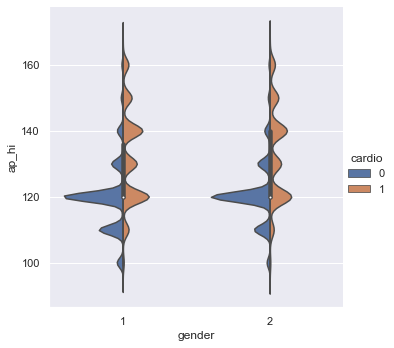

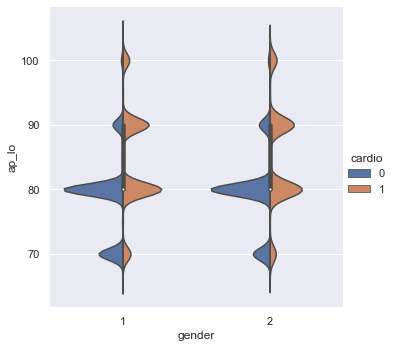

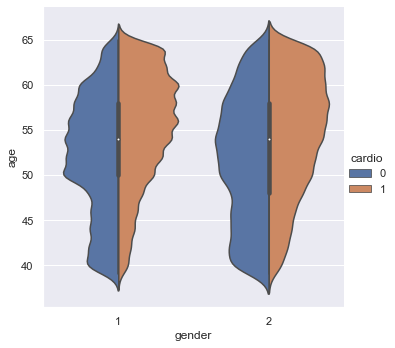

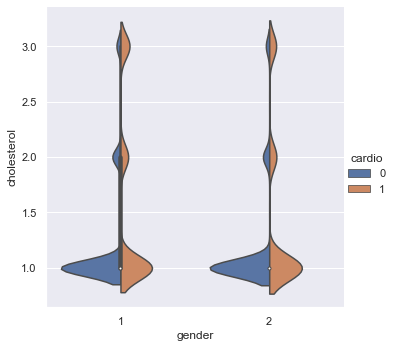

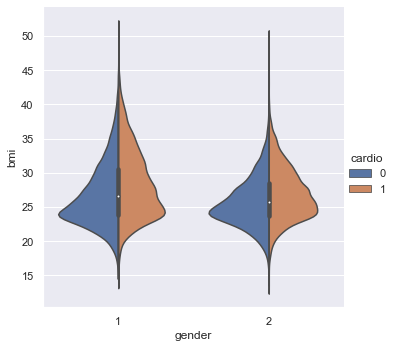

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
num_cols = ["ap_hi", "ap_lo","age","cholesterol","bmi"]
for col in num_cols:
    sns.catplot(x="gender", y=col, hue="cardio", kind="violin", split=True, data=DF)
    plt.show();

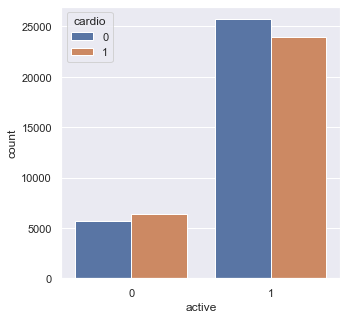

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='active', hue='cardio', data=DF);

In [29]:
DF.smoke.value_counts()

0    56408
1     5339
Name: smoke, dtype: int64

In [30]:
a1=DF[DF['smoke'] == 1]
a1.groupby('cardio')['smoke'].count()

cardio
0    2909
1    2430
Name: smoke, dtype: int64

In [31]:
DF.alco.value_counts()

0    58534
1     3213
Name: alco, dtype: int64

In [32]:
a2=DF[DF['alco'] == 1]
a2.groupby('cardio')['alco'].count()

cardio
0    1723
1    1490
Name: alco, dtype: int64

In [33]:
a3=DF[(DF['smoke'] == 1)&(DF['alco'] == 1)]
a3.cardio.value_counts()

0    922
1    675
Name: cardio, dtype: int64

In [34]:
DFs=a1.groupby('cardio')['smoke'].count()
DFc=a2.groupby('cardio')['alco'].count()


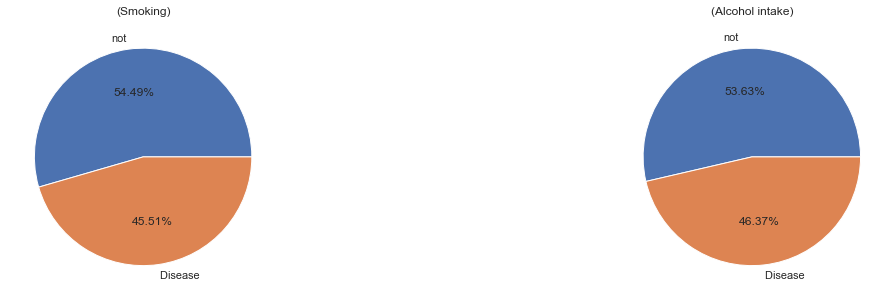

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(DFs,labels=['not','Disease '], autopct='%1.2f%%')
plt.title('(Smoking)')
plt.subplot(1,2,2)
plt.pie(DFc,labels=['not','Disease '],autopct='%1.2f%%')
plt.title('(Alcohol intake)');


In [36]:
a1.groupby('cholesterol')['gluc'].count()

cholesterol
1    3942
2     833
3     564
Name: gluc, dtype: int64

In [37]:
gc=pd.crosstab(DF.cholesterol, DF.gluc)
gc

gluc,1,2,3
cholesterol,,,
1,43505,1898,1316
2,5750,2006,318
3,3537,410,3007


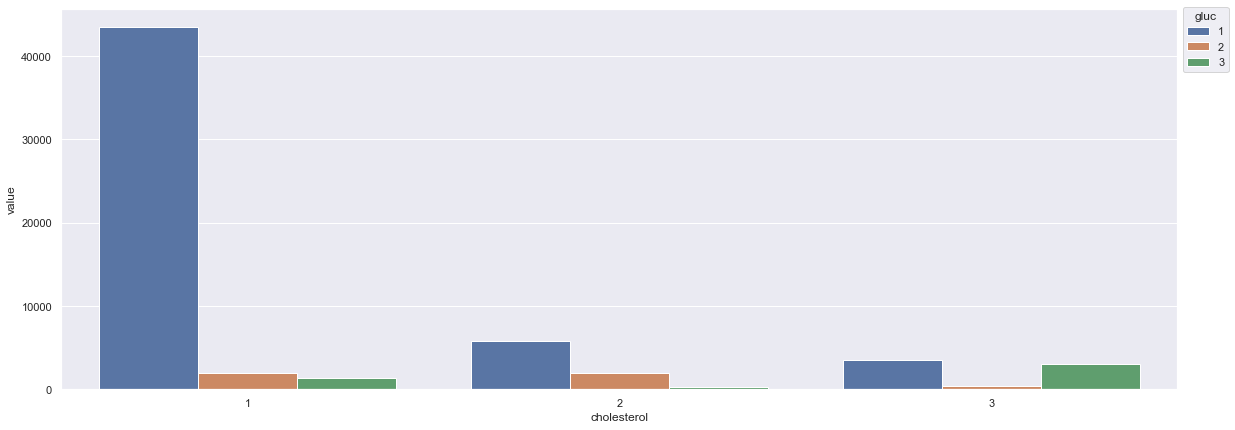

In [38]:
plt.figure(figsize=(20,7))
stacked = gc.stack().reset_index().rename(columns={0:'value'})
p = sns.barplot(x=stacked.cholesterol, y=stacked.value, hue=stacked.gluc)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

In [39]:
cg=pd.crosstab(DF.gender, DF.cardio,margins=True)
cg

cardio,0,1,All
gender,,,
1,20334,19867,40201
2,11037,10509,21546
All,31371,30376,61747


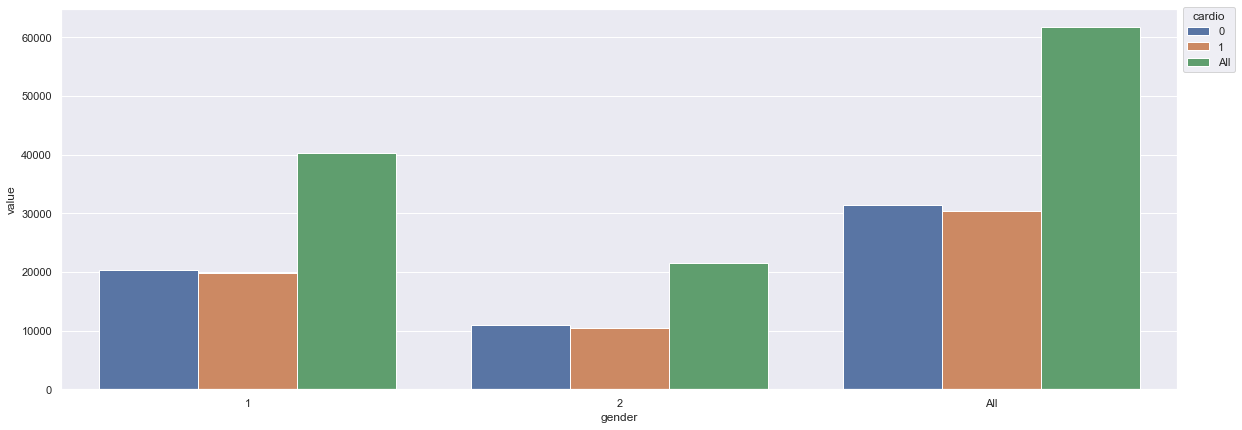

In [40]:
plt.figure(figsize=(20,7))
stacked = cg.stack().reset_index().rename(columns={0:'value'})
p = sns.barplot(x=stacked.gender, y=stacked.value, hue=stacked.cardio)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

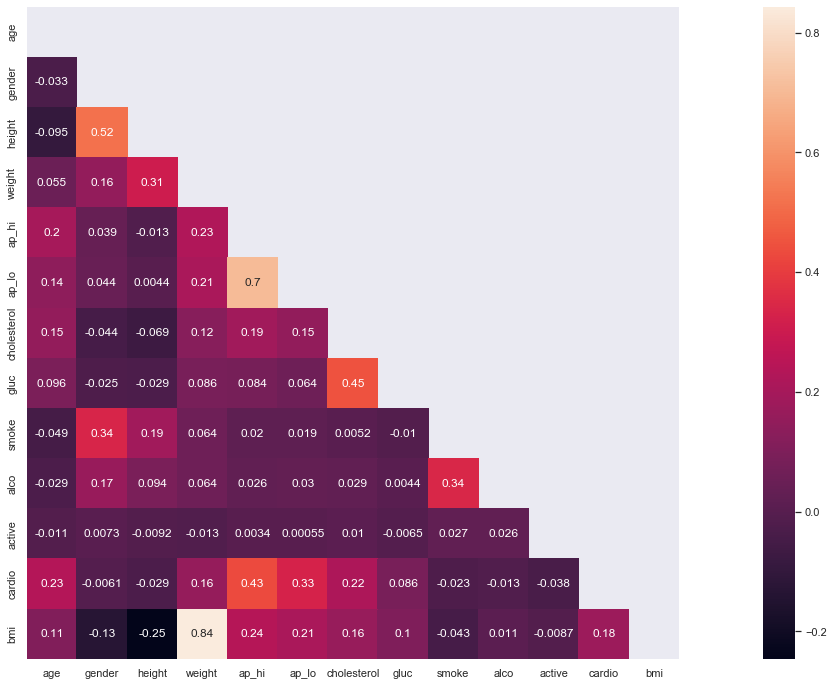

In [41]:
plt.figure(figsize=(30, 12))
mask = np.triu(np.ones_like(DF.corr(), dtype=np.bool))
sns.heatmap(DF.corr(),annot = True,square = True,mask=mask);